In [ ]:
# Mount
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf

In [ ]:
# Import Library
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
from sklearn.cluster import KMeans
import plotly.express as px
import plotly.graph_objs as go
%matplotlib inline

plt.rc('font', family='NanumBarunGothic') 

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# Read Data
# skt =  pd.read_csv('./gdrive/My Drive/빅콘 대상팀/data/SK/skt.csv', index_col='Unnamed: 0')
ska = pd.read_csv('./gdrive/My Drive/빅콘 대상팀/data/SK/ska.csv', index_col='Unnamed: 0')
dong = pd.read_excel('./gdrive/My Drive/빅콘 대상팀/data/지역데이터/구_동.xlsx')

In [ ]:
ska = pd.merge(ska, dong, on='HDONG_NM', how='left')
ska1 = ska.query('HDONG_GU in ["서울 중구"]')
ska2 = ska.query('HDONG_GU in ["서울 노원구"]')

In [ ]:
def make_growth(ska):
    # 연도 추가
    ska['STD_YMD'] = pd.to_datetime(ska['STD_YMD'].astype(str), format='%Y%m%d') # dtype datetime으로 변경
    ska['STD_Y'] = ska['STD_YMD'].dt.year

    # 연령대 나누기
    ska['20세이하'] = np.sum(pd.concat([ska.iloc[:,4:8],ska.iloc[:,19:23]], axis=1), axis=1) # < 10
    ska['20대'] = np.sum(pd.concat([ska.iloc[:,8:10],ska.iloc[:,23:25]], axis=1), axis=1) # 10대
    ska['30대'] = np.sum(pd.concat([ska.iloc[:,10:12],ska.iloc[:,25:27]], axis=1), axis=1) # 20대
    ska['40대'] = np.sum(pd.concat([ska.iloc[:,12:14],ska.iloc[:,27:29]], axis=1), axis=1) # 30대
    ska['50대'] = np.sum(pd.concat([ska.iloc[:,14:16],ska.iloc[:,29:31]], axis=1), axis=1) # 40대
    ska['60세이상'] = np.sum(pd.concat([ska.iloc[:,16:19],ska.iloc[:,31:34]], axis=1), axis=1) # 50대

    ska = ska[['STD_Y', 'HDONG_NM', '20세이하', '20대', '30대', '40대', '50대', '60세이상']]

    ska = ska.groupby(['HDONG_NM','STD_Y']).sum().unstack().reset_index(drop=False)

    ska_col = ['20세이하', '20대', '30대', '40대', '50대', '60세이상']

    for i in ska_col:
        cat_growth = (ska[(i,2020)] - ska[(i,2019)])/ska[(i,2019)]
        ska[(i,'growth')]= cat_growth

    ska_g = ska.droplevel(level=1, axis=1).iloc[:,[0,13,14,15,16,17,18]]

    return ska_g

In [ ]:
ska1_g = make_growth(ska1) #중구의 2019대비 2020 유동인구 증감률
ska2_g = make_growth(ska2) #노원구의 2019대비 2020 유동인구 증감률

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/st

# **1. 중구 유동인구 증감률**

-결과 공개 불가

# **2. 노원구 유동인구 증감률**

-결과 공개 불가

In [ ]:
ska1_g  = pd.DataFrame(ska1_g.set_index('HDONG_NM').stack(level=0).reset_index(drop=False))
ska2_g  = pd.DataFrame(ska2_g.set_index('HDONG_NM').stack(level=0).reset_index(drop=False))
ska1_g.columns = ['HDONG_NM', '연령대', '증감률']
ska2_g.columns = ['HDONG_NM', '연령대', '증감률']

# **3. 중구/노원구 유동인구 증감률 히트맵 시각화**

In [ ]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import AxesGrid

def shiftedColorMap(cmap, start=0, midpoint=0.5, stop=1.0, name='shiftedcmap'):

    cdict = {
        'red': [],
        'green': [],
        'blue': [],
        'alpha': []
    }

    # regular index to compute the colors
    reg_index = np.linspace(start, stop, 257)

    # shifted index to match the data
    shift_index = np.hstack([
        np.linspace(0.0, midpoint, 128, endpoint=False), 
        np.linspace(midpoint, 1.0, 129, endpoint=True)
    ])

    for ri, si in zip(reg_index, shift_index):
        r, g, b, a = cmap(ri)

        cdict['red'].append((si, r, r))
        cdict['green'].append((si, g, g))
        cdict['blue'].append((si, b, b))
        cdict['alpha'].append((si, a, a))

    newcmap = matplotlib.colors.LinearSegmentedColormap(name, cdict)
    plt.register_cmap(cmap=newcmap)

    return newcmap

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 8722 missing from current font.

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning:

Glyph 8722 missing from current font.



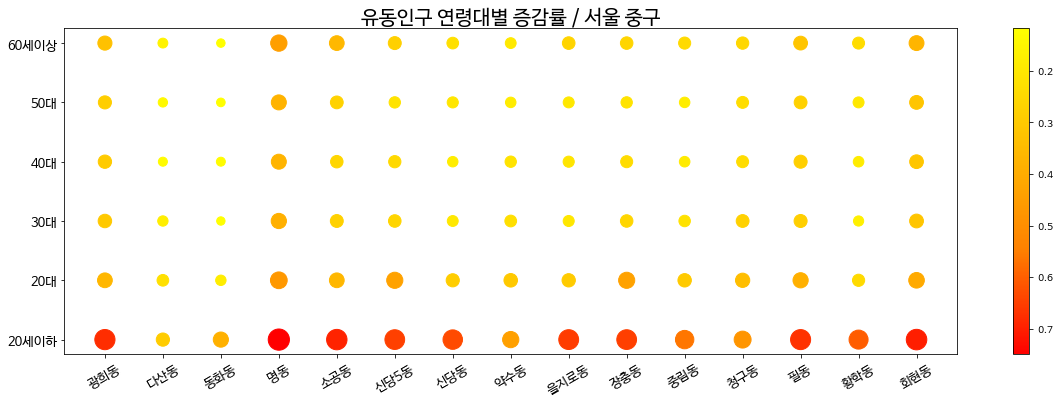

In [ ]:
from sklearn.preprocessing import StandardScaler
from matplotlib import colors

def heatmap(x,y,val):
    # argmax = val.argmax()
    # val[argmax] = 1.5
    
    orig_cmap = matplotlib.cm.autumn # YlGnBu gist_heat
    shifted_cmap = shiftedColorMap(orig_cmap, midpoint=0.32, name='sifted')

    plt.figure(figsize=(20,6))
    
    ny = ['20세이하', '20대', '30대', '40대', '50대', '60세이상']
    # Mapping from column names to integer coordinates
    x_labels = [v for v in x.unique()]
    y_labels = [v for v in ny]
    
    x_to_num = {p[1]:p[0] for p in enumerate(x_labels)} 
    y_to_num = {p[1]:p[0] for p in enumerate(y_labels)} 
    
    # scalar = StandardScaler()
    # new_val = scalar.fit_transform(val.values.reshape(-1,1))

    size = 100
    plt.scatter(
        x = x.map(x_to_num), # Use mapping for x
        y = y.map(y_to_num), # Use mapping for y
        s = abs(val)*600, # Vector of square sizes, proportional to size parameter, 250
        c = val,
        marker='o', # Use square as scatterplot marker
        cmap = shifted_cmap,
    )
    
    # Show column labels on the axes
    plt.title('유동인구 연령대별 증감률 / 서울 중구', fontsize=20)
    plt.xticks([x_to_num[v] for v in x_labels],labels = x_labels, rotation=30, fontsize=13)
    plt.yticks([y_to_num[v] for v in y_labels],labels = y_labels, fontsize=13)
    plt.colorbar()

heatmap(
    x=ska1_g['HDONG_NM'],
    y=ska1_g['연령대'],
    val = ska1_g['증감률']
)

# 모든 동에서 감소

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 8722 missing from current font.

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning:

Glyph 8722 missing from current font.



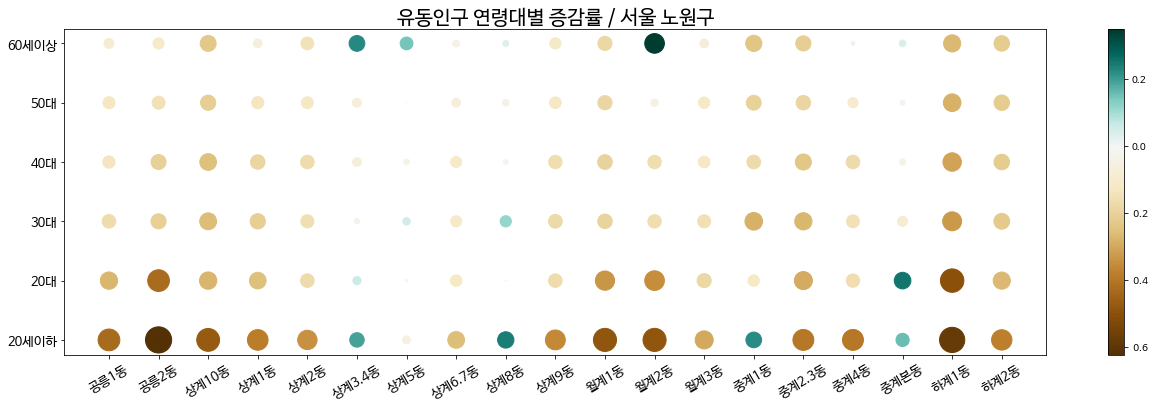

In [ ]:
from sklearn.preprocessing import StandardScaler
from matplotlib import colors

def heatmap(x,y,val):
    # argmax = val.argmax()
    # val[argmax] = 1.5
    
    orig_cmap = matplotlib.cm.BrBG # PuOr
    shifted_cmap = shiftedColorMap(orig_cmap, midpoint=0.64, name='sifted')

    plt.figure(figsize=(22,6))
    
    ny = ['20세이하', '20대', '30대', '40대', '50대', '60세이상']
    # Mapping from column names to integer coordinates
    x_labels = [v for v in x.unique()]
    y_labels = [v for v in ny]
    
    x_to_num = {p[1]:p[0] for p in enumerate(x_labels)} 
    y_to_num = {p[1]:p[0] for p in enumerate(y_labels)} 
    
    # scalar = StandardScaler()
    # new_val = scalar.fit_transform(val.values.reshape(-1,1))

    size = 100
    plt.scatter(
        x = x.map(x_to_num), # Use mapping for x
        y = y.map(y_to_num), # Use mapping for y
        s = abs(val)*1100, # Vector of square sizes, proportional to size parameter, 250
        c = val,
        marker='o', # Use square as scatterplot marker
        cmap = shifted_cmap,
    )
    
    # Show column labels on the axes
    plt.title('유동인구 연령대별 증감률 / 서울 노원구', fontsize=20)
    plt.xticks([x_to_num[v] for v in x_labels],labels = x_labels, rotation=30, fontsize=13)
    plt.yticks([y_to_num[v] for v in y_labels],labels = y_labels, fontsize=13)
    plt.colorbar()

heatmap(
    x=ska2_g['HDONG_NM'],
    y=ska2_g['연령대'],
    val = ska2_g['증감률']
)

# 증가한 동 존재 